In [2]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [5]:
Base.classes.keys()

['measurement', 'station']

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [7]:
#  3. Convert the June temperatures to a list.
june_temps = [x[1] for x in results]
len(june_temps)


1700

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temp_df = pd.DataFrame(results, columns=['date', 'tobs'])
temp_df.head()

,date,tobs
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temp_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [11]:
# 7. Convert the December temperatures to a list.
dec_temps = [x[1] for x in dec_results]
len(dec_temps)

1517

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_results, columns=['date', 'tobs'])
dec_temp_df.head()

,date,tobs
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [234]:
june_rain = session.query(Measurement.station, func.sum(Measurement.prcp)).group_by(Measurement.station).\
                            filter(extract('month', Measurement.date) == 6).all()                          

In [235]:
june_rain

[('USC00511918', 2.4099999999999997),
 ('USC00513117', 27.669999999999995),
 ('USC00514830', 19.069999999999993),
 ('USC00516128', 106.09000000000007),
 ('USC00517948', 4.58),
 ('USC00518838', 2.4600000000000004),
 ('USC00519281', 35.76),
 ('USC00519397', 5.279999999999993),
 ('USC00519523', 11.31)]

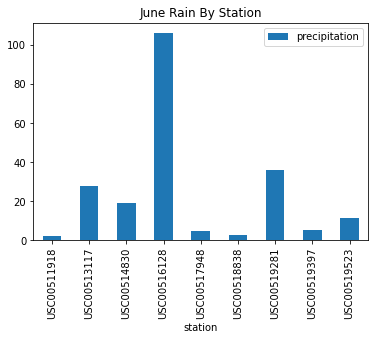

In [238]:
june_rain_df = pd.DataFrame(june_rain, columns=['station', 'precipitation'])
june_rain_df.groupby(['station']).sum().plot(kind="bar", title="June Rain By Station")

In [239]:
december_rain = session.query(Measurement.station, func.sum(Measurement.prcp)).group_by(Measurement.station).\
                            filter(extract('month', Measurement.date) == 12).all()

In [240]:
december_rain

[('USC00511918', 20.860000000000007),
 ('USC00513117', 43.90000000000004),
 ('USC00514830', 22.780000000000012),
 ('USC00516128', 99.88000000000001),
 ('USC00517948', 8.399999999999997),
 ('USC00518838', 7.02),
 ('USC00519281', 53.15000000000005),
 ('USC00519397', 15.589999999999986),
 ('USC00519523', 33.05000000000001)]

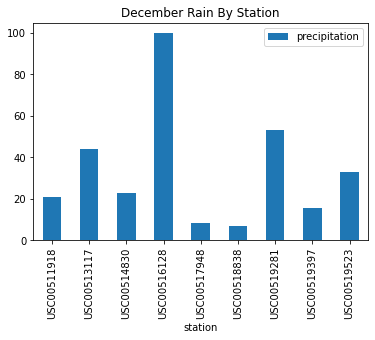

In [241]:
december_rain_df = pd.DataFrame(december_rain, columns=['station', 'precipitation'])
december_rain_df.groupby(['station']).sum().plot(kind="bar", title="December Rain By Station")

In [242]:
december_rain_df.groupby(['station']).sum()

,precipitation
station,
USC00511918,20.86
USC00513117,43.90
USC00514830,22.78
USC00516128,99.88
USC00517948,8.40
USC00518838,7.02
USC00519281,53.15
USC00519397,15.59
USC00519523,33.05
